#  Data Exploration, Pre-Processing and Augmentation

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from dl_utils import *

## 1) Loading the data

In [ ]:
# Set up your Image Generators for the training, validation, and test data

# Don't really know for sure what they mean with this

In [12]:
# Load the datasets as arrays.
path_test = "../data/test"
path_train = "../data/train"
path_val = "../data/val"
X_test, y_test = extract_data(path_test)
X_train, y_train = extract_data(path_train)
X_val, y_val = extract_data(path_val)

## 2) Data exploration

### Training data

In [13]:
# Print the training dataset size.
print(f"Train shape: {X_train.shape}, Labels: {y_train.shape}")

Train shape: (1600, 299, 299), Labels: (1600,)


In [16]:
# Check whether the images always have the same size.

# This will always be the case in a numpy array (Otherwise extract_data would have failed)

<Axes: ylabel='count'>

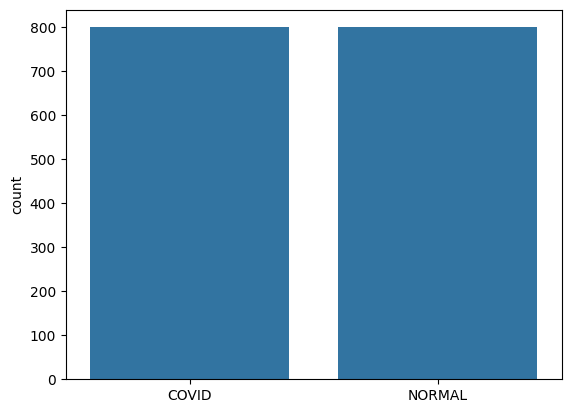

In [14]:
# Show the distribution of two classes present in the dataset.
sns.countplot(x=y_train)

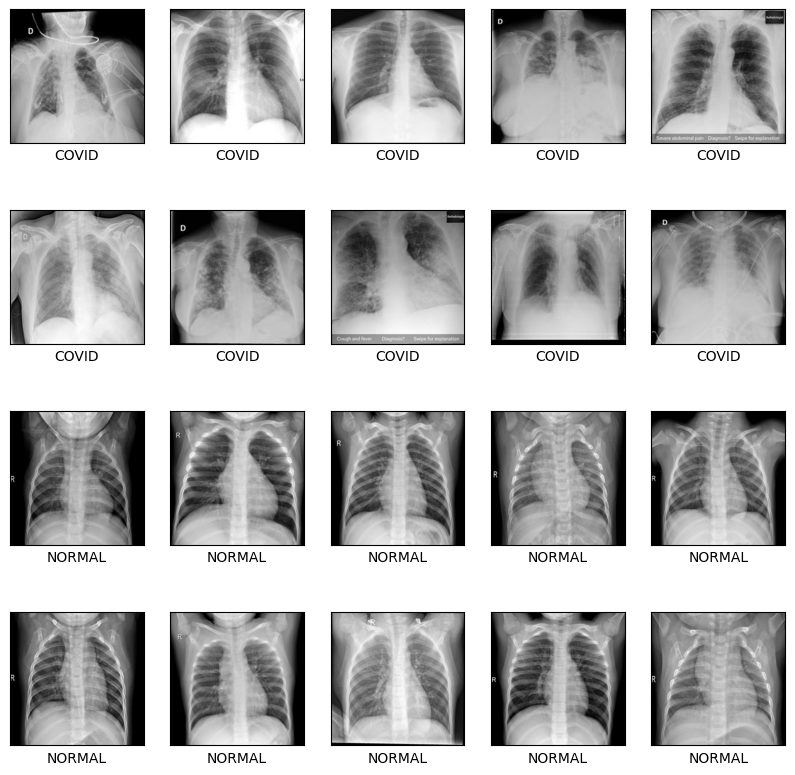

In [15]:
# Plot a few samples from each class with the corresponding label (COVID/normal).
plt.figure(figsize=(10,10))
for plotid, i in enumerate(list(range(10)) + list(range(800, 810))):
    plt.subplot(4, 5, plotid+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

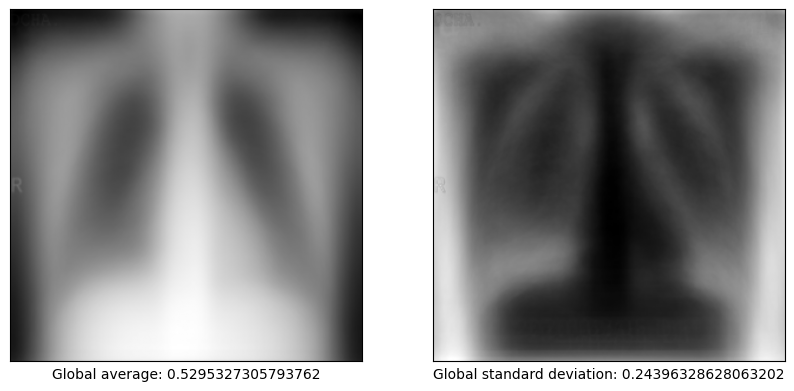

In [16]:
# Display some statistics on the pixel intensities (e.g., pixel average, global average, pixel standard deviation, global standard deviation, . . . )
pixel_average = np.mean(X_train, axis=0)
global_average = np.mean(X_train)
pixel_std_dev = np.std(X_train, axis=0)
global_std_dev = np.std(X_train)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_average, cmap="gray")
plt.xlabel(f"Global average: {global_average}")
plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_std_dev, cmap="gray")
plt.xlabel(f"Global standard deviation: {global_std_dev}")
plt.show()

### Validation data

In [17]:
# Print the validation dataset size.
print(f"Val shape: {X_val.shape}, Labels: {y_val.shape}")

Val shape: (400, 299, 299), Labels: (400,)


<Axes: ylabel='count'>

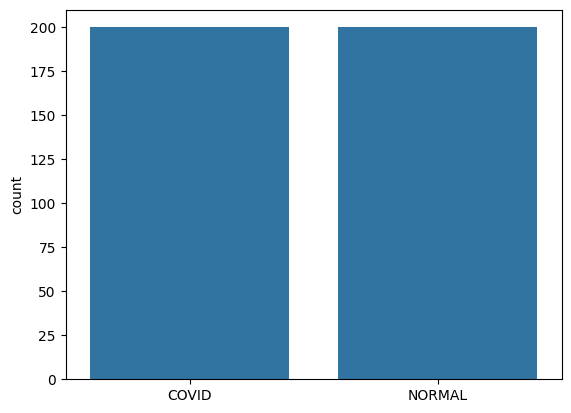

In [18]:
# Show the distribution of two classes present in the dataset.
sns.countplot(x=y_val)

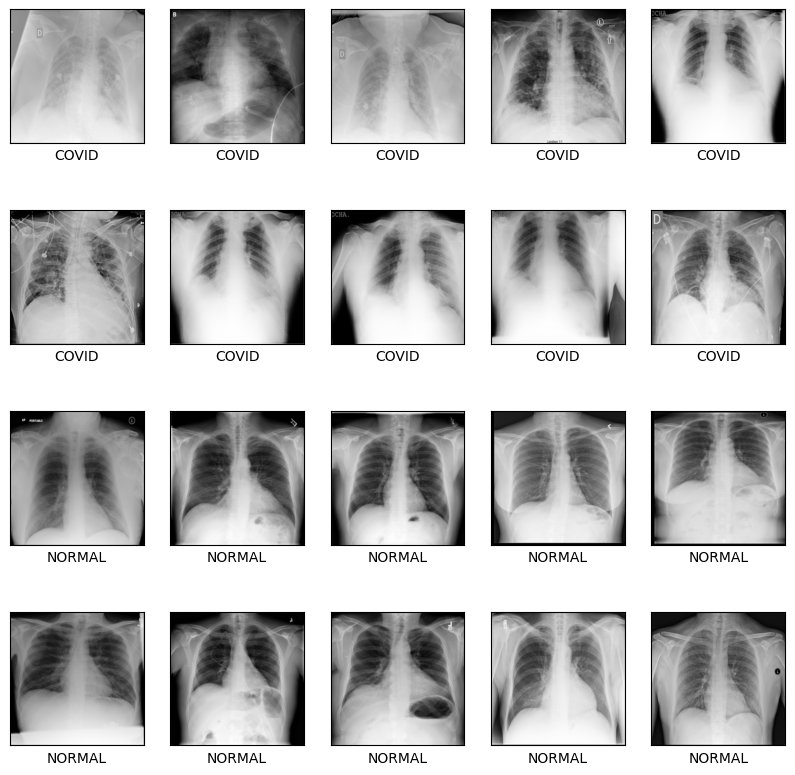

In [19]:
# Plot a few samples from each class with the corresponding label (COVID/normal).
plt.figure(figsize=(10,10))
for plotid, i in enumerate(list(range(10)) + list(range(200, 210))):
    plt.subplot(4, 5, plotid+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i], cmap="gray")
    plt.xlabel(y_val[i])
plt.show()

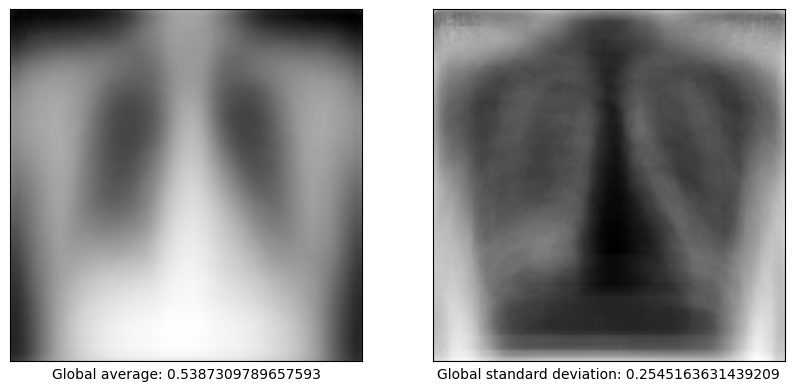

In [20]:
# Display some statistics on the pixel intensities (e.g., pixel average, global average, pixel standard deviation, global standard deviation, . . . )
pixel_average = np.mean(X_val, axis=0)
global_average = np.mean(X_val)
pixel_std_dev = np.std(X_val, axis=0)
global_std_dev = np.std(X_val)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_average, cmap="gray")
plt.xlabel(f"Global average: {global_average}")
plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_std_dev, cmap="gray")
plt.xlabel(f"Global standard deviation: {global_std_dev}")
plt.show()

### Test data

In [21]:
# Print the test dataset size.
print(f"Test shape: {X_test.shape}, Labels: {y_test.shape}")

Test shape: (200, 299, 299), Labels: (200,)


<Axes: ylabel='count'>

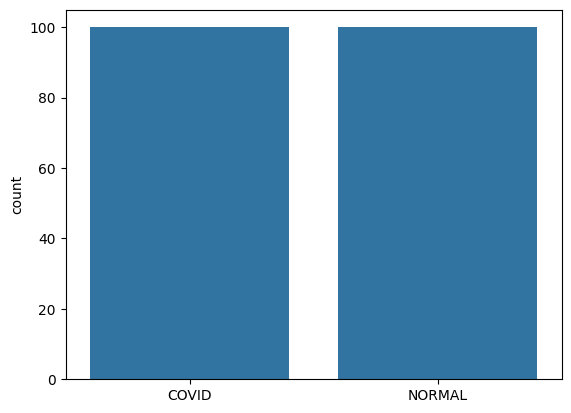

In [22]:
# Show the distribution of two classes present in the dataset.
sns.countplot(x=y_test)

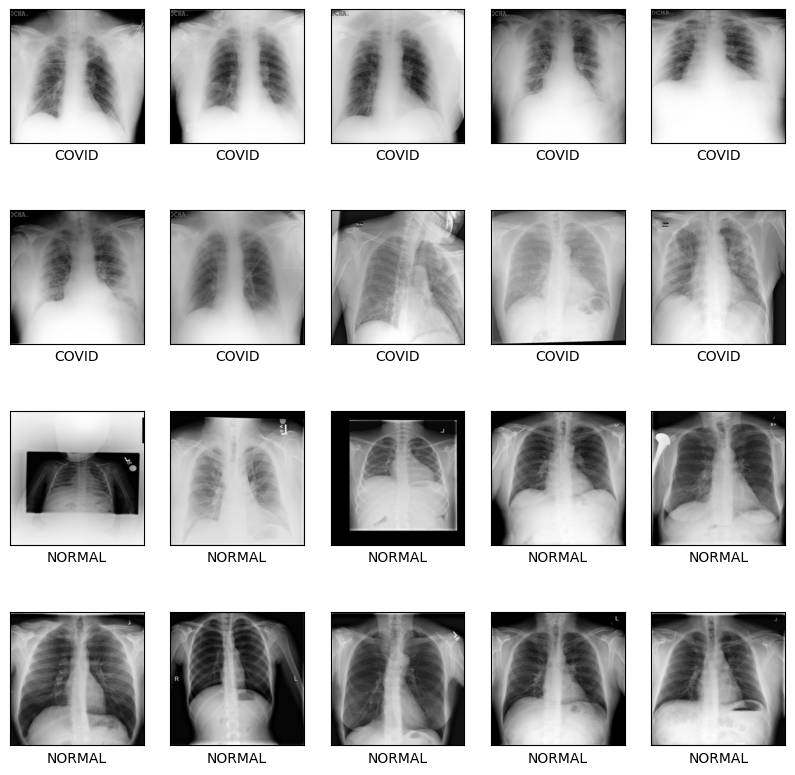

In [23]:
# Plot a few samples from each class with the corresponding label (COVID/normal).
plt.figure(figsize=(10,10))
for plotid, i in enumerate(list(range(10)) + list(range(100, 110))):
    plt.subplot(4, 5, plotid+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap="gray")
    plt.xlabel(y_test[i])
plt.show()

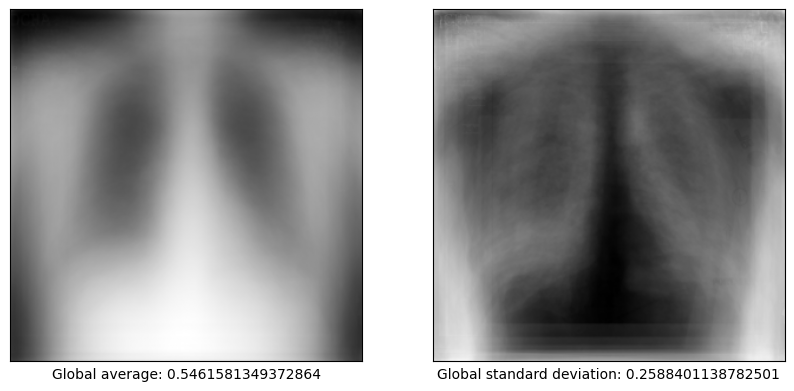

In [24]:
# Display some statistics on the pixel intensities (e.g., pixel average, global average, pixel standard deviation, global standard deviation, . . . )
pixel_average = np.mean(X_test, axis=0)
global_average = np.mean(X_test)
pixel_std_dev = np.std(X_test, axis=0)
global_std_dev = np.std(X_test)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_average, cmap="gray")
plt.xlabel(f"Global average: {global_average}")
plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])
plt.imshow(pixel_std_dev, cmap="gray")
plt.xlabel(f"Global standard deviation: {global_std_dev}")
plt.show()

## 3) Pre-processing

In [3]:
sample = 0 # Change for different image

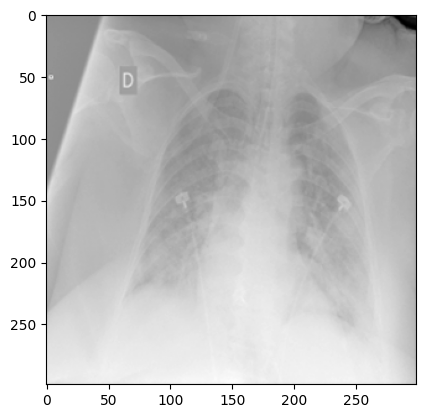

In [4]:
# Original image
plt.imshow(X_val[sample], cmap="gray")

Val shape: (400, 128, 128), Labels: (400,)


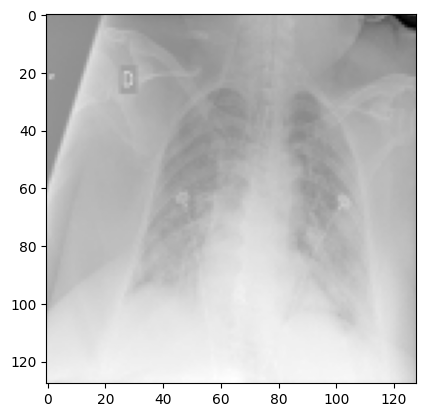

In [5]:
# Optionally, downsample the images by rescaling their size to 128 × 128 pixels.
X_val_downsampled = downsample_images(X_val, 128)
print(f"Val shape: {X_val_downsampled.shape}, Labels: {y_val.shape}")
plt.imshow(X_val_downsampled[sample], cmap="gray")

In [ ]:
# Implement a normalization strategy, using fixed values, the sample statistics, or the statistics of the training datasets, and test it on a sample from the validation dataset.

# Don't know what to test for, I just plotted them to see if nothing went wrong. 

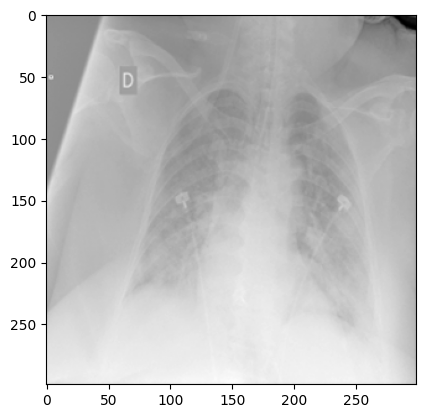

In [6]:
# Fixed values (0-255 to 0-1)
X_val_fixednorm = X_val / 255
plt.imshow(X_val_fixednorm[sample], cmap="gray")

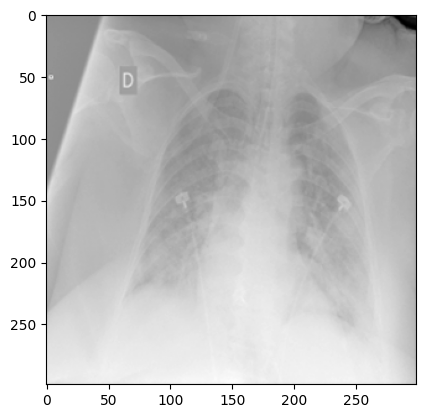

In [7]:
# Sample statistics (per image substract its mean value and divide by its sd)
X_val_samplenorm = np.array([(img - np.mean(img)) / np.std(img) for img in X_val])
plt.imshow(X_val_samplenorm[sample], cmap="gray")

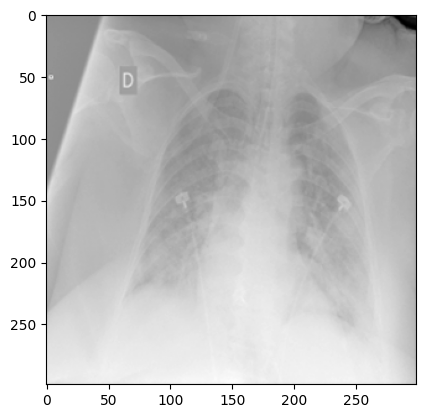

In [8]:
# Training dataset statistic (substract the average training set pixel value and divide by sd of the training set pixel values)
X_val_globalnorm = (X_val - np.mean(X_train)) / np.std(X_train)
plt.imshow(X_val_globalnorm[sample], cmap="gray")

## 4) Augmentation

In [ ]:
# Implement three different relevant types of data augmentation.

# I'm thinking altering brightness, contrast (variation of pixel values) and random pixel noise

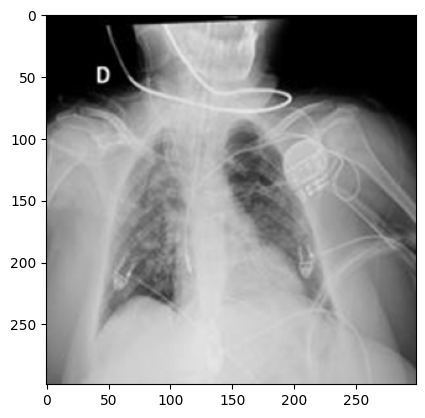

In [3]:
# Original image
sample = 0
plt.imshow(X_train[sample], cmap="gray")

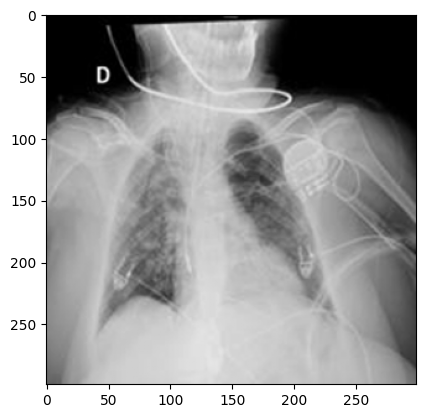

In [4]:
# Visualize the transformations on a sample from the training dataset individually and combined.
X_train_altbrightness = augment_brightness(X_train)
plt.imshow(X_train_altbrightness[sample], cmap="gray")

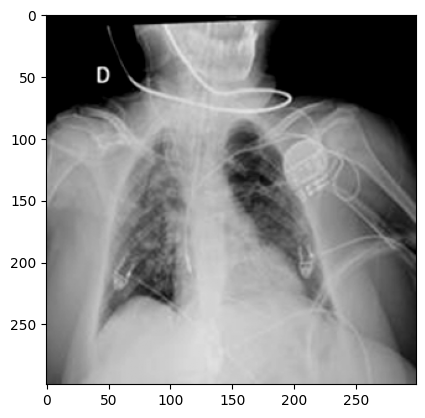

In [5]:
X_train_altcontrast = augment_contrast(X_train)
plt.imshow(X_train_altcontrast[sample], cmap="gray")

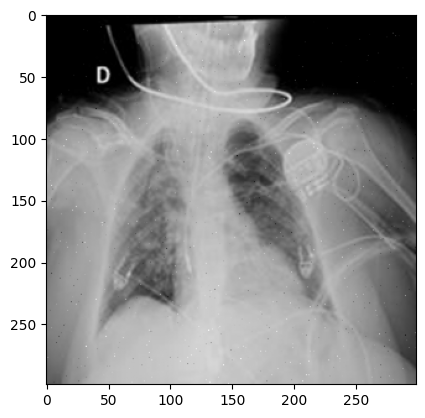

In [4]:
X_train_altnoise = augment_gaussian_noise(X_train)
plt.imshow(X_train_altnoise[sample], cmap="gray")

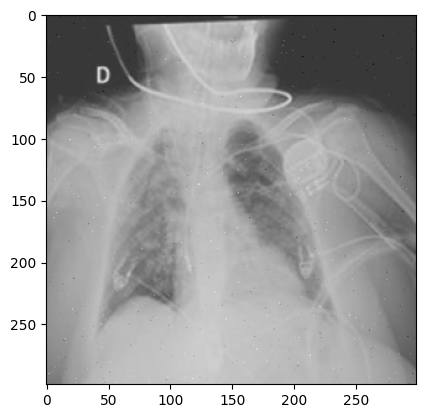

In [8]:
X_train_augmented = augment_gaussian_noise(augment_contrast(augment_brightness(X_train)))
plt.imshow(X_train_augmented[sample], cmap="gray")

## 5) Pipeline

In [ ]:
# Implement the pipelines performing pre-processing and augmentation (only for the training dataset) for your next tasks.

# See preprocess in dl_utils

## Questions

Question 1 In what aspects is this dataset challenging for automatic classification in the designated
categories?

There are enough examples for both classes, the pixel and global statistics between the splits are similar and the resolution is big enough.
Maybe the limitation to grayscale images, low contrasts, different zoom levels and slight variations in angles are problems.

Question 2 According to the computed pixel statistics and label distribution, do the training, validation,
and test datasets appear uniformly divided?

They seem to be uniformly divided (see similarity plotted images of pixel statistics and global statistics).

Question 3 Are there any noticeable differences in image quality between the COVID and normal
X-ray images? Could variations in intensity distribution or artifacts affect model performance?

COVID images seem to be somewhat more white/foggy. This could be a problem if the model classifies based on this brightness and the brightness is unrelated to having COVID or not. If it is unrelated, the model could be not generalisable (maybe it does work for this test set but not for test sets from other sources).

Question 4 If not accounted for, the original resolution may lead to unnecessarily extended training
time and memory usage when developing the classifiers, without any performance benefit. How
do you intend to deal with it? Is downsampling a good solution, or would it lead to significant
information loss? Do you have a different approach?

The downsampling applied here seems to be okay as it is still very clear to the human eye so the model will probably still have enough information to work with. If the images are of good enough quality, there is also the possibility to train on a smaller subsample. 

Question 5 Did you normalize the images using fixed values, dataset statistics, or sample statistics?
Did you normalize along the spatial dimensions or normalize each pixel differently? Assuming
a standard convolutional neural network model, which strategy would give the best discriminative
features?

It is probably better to have images with pixel values in the same range, so normalization over all images using sample statistics seem the best choice?

Question 6 Do the augmented images still represent realistic X-ray variations, or could excessive
transformations introduce unrealistic patterns? How can we ensure our model generalizes well to
unseen data?

Augmentation should only result in images that could occur in test/unseen data. Based on the data we have, intense augmentation doesn't seem necessary?